In [2]:
import os
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix,classification_report
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
import re
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [3]:
df = pd.read_csv("/Users/alyssaschulte/Desktop/Clothing.csv", index_col = 0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 10)

In [7]:
#getting rid of null values
df = df.dropna()
df = df.reset_index(drop = True)
df.shape

(19662, 10)

In [8]:
#checking if any reviews are empty
df = df[df['Review Text']!= '']
df = df[df['Review Text']!= ' ']
df.shape

(19662, 10)

In [9]:
#changing clothing ID to be categorical
df['Clothing ID'] = df['Clothing ID'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  object
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.7+ MB


In [10]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [11]:
print(df['Division Name'].unique())
print(df['Department Name'].unique())
print(df['Class Name'].unique())

['General' 'General Petite' 'Initmates']
['Dresses' 'Bottoms' 'Tops' 'Intimate' 'Jackets' 'Trend']
['Dresses' 'Pants' 'Blouses' 'Knits' 'Intimates' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Shorts' 'Legwear' 'Layering' 'Casual bottoms' 'Chemises']


In [12]:
#need to fix typo in division name
df['Division Name'].replace({'Initmates':'Intimates'},inplace=True)
df.head(15)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
6,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
7,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
8,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
9,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


In [13]:
fig = px.histogram(df, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Rating')
fig.show()

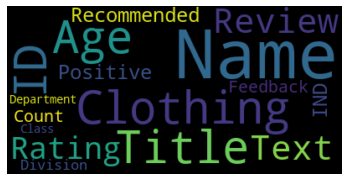

In [14]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(Rating for Rating in df)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [15]:
# assign reviews with rating > 3 as positive sentiment
# rating < 3 negative sentiment
# remove rating = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df.loc[:, 'Rating'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,-1
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,1


In [18]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [19]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [20]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',',','-'))
    return final

df = df.dropna(subset=['Review Text'])
df['Review Text'] = df.loc[:,'Review Text'].apply(remove_punctuation)

In [21]:
dfNew = df[['Review Text','sentiment']]
dfNew.head()

,Review Text,sentiment
1,I love love love this jumpsuit it's fun flirty...,1
2,This shirt is very flattering to all due to th...,1
3,I love tracy reese dresses but this one is not...,-1
4,I aded this in my basket at hte last mintue to...,1
5,I ordered this in carbon for store pick up and...,1


In [22]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [23]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Review Text'])
test_matrix = vectorizer.transform(test['Review Text'])

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
LogisticRegression(max_iter=1000000000)

LogisticRegression(max_iter=1000000000)

In [26]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [27]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [28]:
predictions = lr.predict(X_test)

In [29]:
# find accuracy, precision, recall:
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 303,   79],
       [ 155, 3142]])

In [30]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.66      0.79      0.72       382
           1       0.98      0.95      0.96      3297

    accuracy                           0.94      3679
   macro avg       0.82      0.87      0.84      3679
weighted avg       0.94      0.94      0.94      3679

